<h1>Random Forest Pros & Cons</h1>

<h3>Performance</h3>

<p>When it comes to performance Random Forest has the following advantages:</p>
<ul>
    <li>Probably the biggest advantage of Random Forests is that they generally perform well without any tuning.</li>
    <li>They will also perform decently well on almost every dataset.</li>
</ul>

 It is not possible to split the following dataset with a line without manipulating the features. However, a random forest will perform just fine on this dataset.

<p>
    A linear model, for example, cannot perform well on a dataset that cannot be split with a line.<br/>
    As an example look at the dataset generated by the <strong>make_circles</strong> function below.
</p>

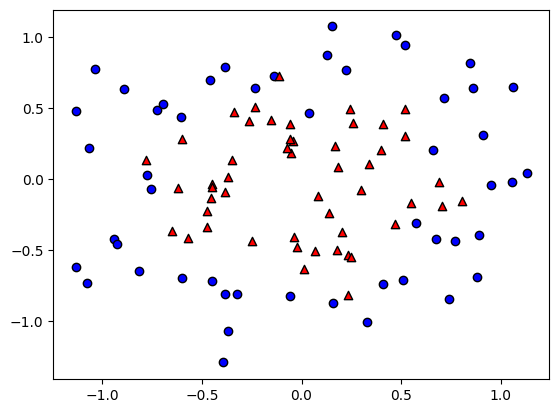

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

# Plot the outer circle points (class 0) as blue dots
outer_circle = X[y == 0]
plt.scatter(outer_circle[:, 0], outer_circle[:, 1], c='blue', marker='o', edgecolors='k', label='Outer Circle')

# Plot the inner circle points (class 1) as red triangles
inner_circle = X[y == 1]
plt.scatter(inner_circle[:, 0], inner_circle[:, 1], c='red', marker='^', edgecolors='k', label='Inner Circle')

<p>We use the kfold cross validation to compare the accuracy scores and view the results</p>

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=1)
lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.8300000000000001


<strong>
    We see that the Regression model performs worse than random guessing but the Random Forest model performs quite well.
</strong>

<strong>
    Because a Logistic Regression model and a Random Forest model both have a potential to perform well without any tuning, it is common practice to start by building these two models.<br/><br/>
    Which will give us the metric values to beat in a new experimental model. Oftentimes it is almost impossible to do better than these benchmarks.
<strong>

<h3>Interpretability</h3>

<ul>
    <li>
        Random Forests, despite being made up of Decision Trees, are not easy to interpret.
    </li>
    <li>
        A random forest has several decision trees, each of which is not a very good model, but when averaged, create an excellent model.
    </li>
    <li>
        Thus Random Forests are not a good choice when looking for interpretability.
    </li>
</ul>

<strong>In most cases, interpretability is not important.</strong>

<h3>Computation</h3>

<ul>
    <li>
        Random Forests can be a little slow to build, especially if you have a lot of trees in the random forest. 
    </li>
    <li>
    Building a random forest usually involves building 10-100 decision trees.<br/>
        Each of the decision trees is faster to build than a standard decision tree because of how we do not compare every feature at every split.<br/>However given the quantity of decision trees it is often slow to build.
    </li>
    <li>
    Similarly, predicting with a Random Forest will be slower than a Decision Tree since we have to do a prediction with each of the 10-100 decision trees in order to get our final prediction.
    </li> 
</ul>

<strong>
    Random Forests are not the fastest model, but generally this is not a problem since the computational power of computers is a lot.
</strong>strong>